Tokenize corpus

In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Sample text
f = open('./textdata.txt', 'r')
text = f.read()
f.close()

doc = nlp(text)
# tokenize text
corpus = [token.text for token in doc]

Create Count Matrix

In [17]:
from collections import defaultdict
import numpy as np
import pandas as pd


def triagrams_count_matrix(corpus):
    bigrams = []
    unigram = []
    count_matrix_dict = defaultdict(int)

    for i in range(len(corpus) - 3 + 1):
        trigram = corpus[i : i + 3]
        # Chuyển bigram thành tuple
        bigram = tuple(trigram[:-1])
        last_word = trigram[-1]

        if last_word not in unigram:
            unigram.append(last_word)

        if bigram not in bigrams:
            bigrams.append(bigram)

        count_matrix_dict[(bigram, last_word)] += 1

    count_matrix = np.zeros((len(bigrams), len(unigram)))
    for trigram_key, trigram_count in count_matrix_dict.items():
        count_matrix[bigrams.index(trigram_key[0]), unigram.index(trigram_key[1])] = trigram_count
    count_matrix = pd.DataFrame(count_matrix, index=bigrams, columns=unigram)
    return count_matrix

count_matrix = triagrams_count_matrix(corpus)

Create Probability Matrix

In [18]:
# Tao mot ma tran voi tong theo hang ngang cua count_matrix
row_sum = count_matrix.sum(axis=1)
# chia
prob_matrix = count_matrix.div(row_sum, axis=0)
print(prob_matrix)

                            learning   English    ,   am  Japanese    .  From  \
(I, am)                          1.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
(am, learning)                   0.0  0.666667  0.0  0.0  0.333333  0.0   0.0   
(learning, English)              0.0  0.000000  1.0  0.0  0.000000  0.0   0.0   
(English, ,)                     0.0  0.000000  0.0  1.0  0.000000  0.0   0.0   
(,, am)                          1.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
...                              ...       ...  ...  ...       ...  ...   ...   
(began, arresting)               0.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
(arresting, demonstrators)       0.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
(demonstrators, and)             0.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
(and, banning)                   0.0  0.000000  0.0  0.0  0.000000  0.0   0.0   
(banning, the)                   0.0  0.000000  0.0  0.0  0.000000  0.0   0.0   

                           

Given two previous word, predict next word

In [38]:
prefix_word = ('am', 'learning')
mask = prob_matrix.index == prefix_word
best = 0
next_word = ''
if mask.any():
    row = prob_matrix[mask].iloc[0]
    for column, value in row.items():
        if value > 0:
            if value > best:
                best = value
                next_word = column
            print(f"word: {column}, Probability: {value}")
else:
    print("Not found")
print(f"Next word: {next_word}, Probability: {best}")


word: English, Probability: 0.6666666666666666
word: Japanese, Probability: 0.3333333333333333
Next word: English, Probability: 0.6666666666666666


Visualize

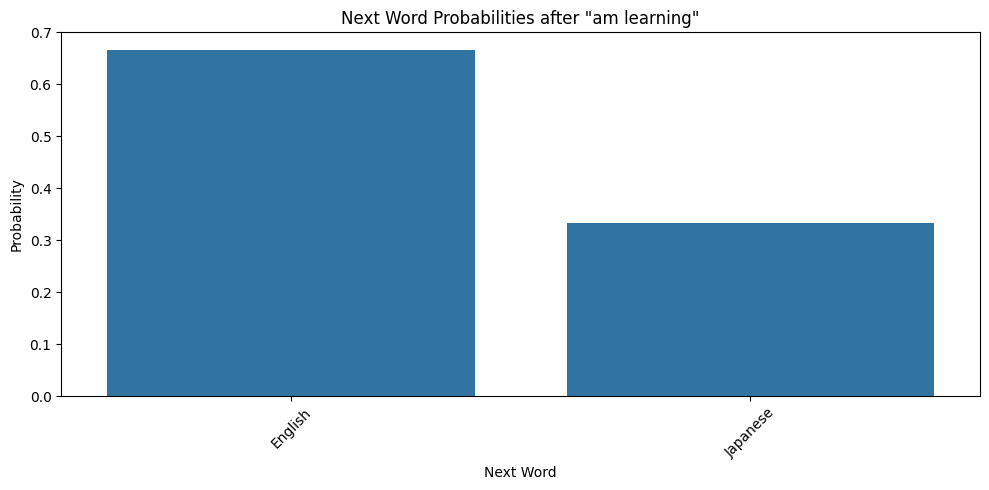

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

prefix_word = ('am', 'learning')
mask = prob_matrix.index == prefix_word
if mask.any():
    row = prob_matrix[mask].iloc[0]
    # Filter only non-zero probabilities
    non_zero_probs = row[row > 0]

    # Create bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=non_zero_probs.index, y=non_zero_probs.values)
    plt.title(f'Next Word Probabilities after "{prefix_word[0]} {prefix_word[1]}"')
    plt.xlabel('Next Word')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Not found")